<a href="https://colab.research.google.com/github/polydiaguiar/turnover-prediction-final-project/blob/main/turnover_prediction_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## | 📚 IMPORT DE BIBLIOTECA

In [44]:
# Silenciar WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Biblioteca para montar drive no colab
from google.colab import drive

# Biblioteca para manipulação dos dados
import pandas as pd
import numpy as np

# Bibliotecas para testes estatísticos
from scipy.stats import shapiro, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import panel as pn
import plotly.express as px

# Biblioteca para aprendizado de máquina
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC               # Para Support Vector Classification
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron
from xgboost import XGBClassifier




# ENTENDENDO DADOS

### | 📂 LEITURA DE DADOS

In [3]:
# Cria drive no colab
drive.mount('/content/drive', force_remount=True)

# Especifica caminho do arquivo a ser lido
caminho = '/content/drive/MyDrive/bancos/RH-DATASET.csv'

Mounted at /content/drive


In [4]:
# Instancia variável atribuindo arquivo
df = pd.read_csv(caminho)

### | ☑️ DATA WRANGLING

In [5]:
# Visualizar 5 primeiras linhas
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Visualiza as colunas do datset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Visualiza informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Checa se há ids repetidos
df['EmployeeNumber'].duplicated().value_counts()

,count
EmployeeNumber,
False,1470


In [9]:
# Dicionário para entender a cardinalidade, verificar se os tipos estão corretos e entender os valores de baixa cardinalidade

# Imprime valores únicos caso cardinalidade seja no máximo 15

dic = pd.DataFrame({
    'Tipo': df.dtypes,
    'Total Valores únicos': df.nunique(),
    'Valores mais frequentes': df.mode().iloc[0],
    'Valores únicos': df.apply(lambda x: list(x.unique()) if x.nunique()<=15 else "N/A")
})

print('🗃️ Resumo de informações:')
dic

🗃️ Resumo de informações:


,Tipo,Total Valores únicos,Valores mais frequentes,Valores únicos
Age,int64,43,35.0,N/A
Attrition,object,2,No,"[Yes, No]"
BusinessTravel,object,3,Travel_Rarely,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
DailyRate,int64,886,691.0,N/A
Department,object,3,Research & Development,"[Sales, Research & Development, Human Resources]"
DistanceFromHome,int64,29,2.0,N/A
Education,int64,5,3.0,"[2, 1, 4, 3, 5]"
EducationField,object,6,Life Sciences,"[Life Sciences, Other, Medical, Marketing, Tec..."
EmployeeCount,int64,1,1.0,[1]
EmployeeNumber,int64,1470,1,N/A


In [10]:
# Função para testar a normalidade das colunas numéricas
def test_normalidade(coluna):
  w_stat,p_value = shapiro(coluna)
  return "Normal" if p_value > 0.05 else "Não normal"

# Seleciona colunas numéricas
num = df.select_dtypes(include=['number'])

# Testa normalidade em cada coluna com apply()
dis_normal = num.apply(test_normalidade)

# Calcula assimetria (skewness) em cada coluna
assimetria = num.skew().round(4)

# Dataframe com as informaçções por coluna
resumo = pd.DataFrame({
    'Distribuição (Shapiro-Wilk)': dis_normal,
    ' Assimetria': assimetria
})

resumo

,Distribuição (Shapiro-Wilk),Assimetria
Age,Não normal,0.4133
DailyRate,Não normal,-0.0035
DistanceFromHome,Não normal,0.9581
Education,Não normal,-0.2897
EmployeeCount,Normal,0.0000
EmployeeNumber,Não normal,0.0166
EnvironmentSatisfaction,Não normal,-0.3217
HourlyRate,Não normal,-0.0323
JobInvolvement,Não normal,-0.4984
JobLevel,Não normal,1.0254


#### 📑 Resumo executivo Data Wrangling

* 35 colunas e 1470 linhas
* Não há 'missing values'
* Não há ids ('EmployeeNumber') repetidos
* Colunas numéricas: apenas duas tem distribuição normal, as demais possuem distribuição assimétrica (majoritariamente positiva)
* 'StockOptionLevel': o nível disponível para escolha é definido pela empresa, que usualmente defini os requisitos baseados em senioridade e até performance, por isto classifiquei como categórica ordinal


##### 🟩 Classificação das variáveis

* **Variáveis categóricas nominal:** 'Attrition' (Variável target), 'Department', 'EducationField', 'EmployeeNumber', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime',
* **Variáveis categóricas ordinal:** 'BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction','JobLevel', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel'.
* **Variáveis numéricas contínuas:** 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
* **Variáveis numéricas discretas:** 'Age', 'DailyRate', 'EmployeeCount', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany' 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'.



### | 📊 ANÁLISE EXPLORATÓRIA


#### **Análise Exploratória Univariada**

In [19]:
# Imprime dados estatísticos das variáveis numéricas
df.describe(include=['number'])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
# Imprime dados das frequências das variáveis categóricas
df.describe(exclude=['number'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [21]:
# Inicializa paleta de cores para reutilização nos gráficos
palette = {
    # Cores da interface (mantive o fundo claro para legibilidade)
    'background': '#FFFFFF',
    'text': '#08415C', # Usando o azul escuro para o texto principal
    'grid': '#D3D3D3', # Um cinza claro para as grades

    # Cores principais para dados e destaques
    'primary': '#08415C',    # Indigo dye
    'accent': '#CC2936',     # Persian red
    'secondary': '#F1BF98',  # Peach
    'gray1': '#6B818C',      # Slate gray

    # Cores para linhas estatísticas (média, mediana)
    'mean': '#CC2936',       # O vermelho para dar bastante destaque à média
    'median': '#6B818C'      # O cinza ardósia para a mediana
}

In [22]:
# Garante que o Plotly funcione bem com o Panel aqui no Colab
pn.extension('plotly')

# Definindo as listas de colunas
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
colunas_categoricas = df.select_dtypes(include=['category']).drop('Gender', axis=1, errors='ignore').columns.tolist()

# Cria Widget para filtrar por gênero
gender_filter = pn.widgets.Select(
    name='Filtrar por gênero',
    options=['All'] + list(df['Gender'].unique())
)

# Cria widget para selecionar a variável a ser analisada
variable_selector = pn.widgets.Select(
    name='Selecionar Variável',
    options=colunas_numericas + colunas_categoricas
)

# O decorator agora "escuta" as mudanças nos dois widgets
@pn.depends(gender_filter.param.value, variable_selector.param.value)
def update_plots(gender_val, variable_val):
    # Filtra o DataFrame com base no gênero
    filtered_df = df.copy()  # Alterado para df em vez de df_tratado para consistência
    if gender_val != 'All':
        filtered_df = filtered_df[filtered_df['Gender'] == gender_val]

    # Verifica o tipo da variável selecionada
    is_numeric = variable_val in colunas_numericas
    is_categorical = variable_val in colunas_categoricas

    # SE A VARIÁVEL FOR NUMÉRICA
    if is_numeric:
        # Cálculo estatístico para a variável selecionada
        stats = {
            'mean': filtered_df[variable_val].mean(),
            'median': filtered_df[variable_val].median()
        }

        # 1. Histograma
        hist = px.histogram(
            filtered_df, x=variable_val, nbins=30,
            color=None if gender_val != 'All' else 'Gender',
            color_discrete_map={'Female': palette['primary'], 'Male': palette['accent']},
            title=f'<b style="color:{palette["primary"]}">Distribuição de {variable_val}</b>'
        )

        # Adiciona a linha da MÉDIA
        hist.add_vline(x=stats['mean'], line=dict(color=palette['mean'], width=2, dash='dash'),
                      annotation_text=f"Média: {stats['mean']:.2f}")

        # 2. Boxplot
        box = px.box(
            filtered_df, y=variable_val,
            x=None if gender_val != 'All' else 'Gender',
            color=None if gender_val != 'All' else 'Gender',
            color_discrete_map={'Female': palette['primary'], 'Male': palette['accent']},
            title=f'<b style="color:{palette["primary"]}">Boxplot de {variable_val}</b>'
        )

        return pn.Row(hist, box, sizing_mode='stretch_width')

    # SE A VARIÁVEL FOR CATEGÓRICA
    elif is_categorical:
        # Calcula a contagem de cada categoria
        counts = filtered_df[variable_val].value_counts().reset_index()
        counts.columns = ['Categoria', 'Contagem']

        # Cria o gráfico de barras
        bar_chart = px.bar(
            counts, x='Categoria', y='Contagem', text_auto=True,
            color='Categoria' if gender_val == 'All' else None,
            title=f'<b style="color:{palette["primary"]}">Distribuição de {variable_val}</b>'
        )

        # Melhora a apresentação para variáveis categóricas
        bar_chart.update_layout(showlegend=False)
        return bar_chart

    # CASO NÃO SEJA NEM NUMÉRICO NEM CATEGÓRICO (PROTEÇÃO)
    else:
        return pn.pane.Alert(f"A variável {variable_val} não é numérica nem categórica.", alert_type="warning")

# Monta dashboard final
dashboard = pn.Column(
    pn.Row(
        pn.pane.Markdown("## Análise de Desempenho Acadêmico"),
        gender_filter,
        variable_selector,
        styles={'background': palette['background'], 'padding': '10px'}
    ),
    update_plots,
    styles={'background': 'white', 'border': f"1px solid {palette['gray1']}"},
    sizing_mode='stretch_width'
)

dashboard.servable()

Column(sizing_mode='stretch_width', styles={'background': 'white', ...})
    [0] Row(styles={'background': '#FFFFFF', ...})
        [0] Markdown(str)
        [1] Select(name='Filtrar por gênero', options=['All', 'Female', 'Male'], value='All')
        [2] Select(name='Selecionar Variável', options=['Age', 'DailyRate', ...], value='Age')
    [1] ParamFunction(function, _pane=Row, defer_load=False)

In [23]:
# Visualiza distribuição dentro dos gêneros de joblevel

male =  df[df['Gender']=='Male']
female = df[df['Gender']=='Female']

joblevel_fe =(female['JobLevel']>2).value_counts()/len(female)
print('👩 Distribuição hierárquica - Mulheres\n', joblevel_fe)

joblevel_ma =(male['JobLevel']>2).value_counts()/len(male)
print('\n🧔 Distribuição hierárquica - Homens', joblevel_ma)


👩 Distribuição hierárquica - Mulheres
 JobLevel
False    0.712585
True     0.287415
Name: count, dtype: float64

🧔 Distribuição hierárquica - Homens JobLevel
False    0.746032
True     0.253968
Name: count, dtype: float64


In [24]:
# Visualiza distribuição do % de aumento salarial dentro dos subgrupo de gênero
result1 = (female['PercentSalaryHike']>15).value_counts()/len(female)
print('👩 % Aumento salarial acima de 15% - Mulheres\n', result1)

result2 = (male['PercentSalaryHike']>15).value_counts()/len(male)
print('\n 🧔 % Aumento salarial acima de 15%  - Homens', result2)

👩 % Aumento salarial acima de 15% - Mulheres
 PercentSalaryHike
False    0.620748
True     0.379252
Name: count, dtype: float64

 🧔 % Aumento salarial acima de 15%  - Homens PercentSalaryHike
False    0.628118
True     0.371882
Name: count, dtype: float64


In [25]:
# Visualizar a composição do df em relação ao gênero
df['Gender'].value_counts()

,count
Gender,
Male,882
Female,588


In [26]:
# Visualizando os detalhes de pessoas que responderam 0 para o número de companias trabalhadas
df[df['NumCompaniesWorked']==0]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,3,80,1,3,2,3,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,No,Travel_Rarely,557,Sales,3,3,Medical,1,2024,...,3,80,2,10,2,3,9,7,3,4
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,...,3,80,1,21,3,3,20,7,0,10
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7


##### 📑 Resumo Executivo - Análise Exploratória Univariada

* 60% gênero masculino e 40% gênero feminino.

* Idade: varia de 18 a 60 anos, com mediana de 36 anos.

* Diárias (DailyRate): a mediana para o gênero feminino (825.5) é maior que a mediana para o gênero masculino (783).

* Distância de casa: os dois grupos tem distribuição similar, 75% moram a no mínimo 14 unidades de distância do trabalho, e 50% a menos de 7.

* Salário por hora (HourlyRate) e salário mensal (MonthlyIncome): a mediana do grupo feminino é levemente superior que a mediana do grupo masculino para as duas métricas, 67 contra 65 e 5.081,5 contra 4.837,5. Como esperado para distribuição de salário, os salários altos puxam a assimetria para a direita.

* Número de companias trabalhadas: assumi que a coluna se refere a companias diferentes da atual, sendo assim, por adoção aquelas colunas atribuídas com 0 referem-se as pessoas que trabaharam apenas na compania em que foi realizada a pesquisa. No conjunto de dados avaliados, as mulheres tem mediana(2) de companias maior que a dos homens(1).

* Em relação ao aumento salarial, observa-se equilíbrio entre gêneros, com aproximadamente 62% dos colaboradores (tanto homens quanto mulheres) recebendo aumento inferiore a 15% (mediana de 14%). Contudo, a análise por nível hierárquico revela uma disparidade alarmante: no grupo de mulheres, 29% ocupam cargos de nível 3, 4 e 5, já no grupo homens 25% estão nestes níveis, em números absolutos isto corresponde a 171 contra 221 cargos, essa diferença representa 50 cargos de maior hierarquia a mais ocupados por homens, evidenciando uma sub-representação feminina nos níveis mais altos da organização.

* A análise de tempo na função atual mostra que o terceiro quartil (Q3) da distribuição é de 7 anos, indicando que 75% dos colaboradores estão em seus cargos por um período igual ou inferior a este. Ao segmentar por gênero, observa-se que não há diferença na tendência central, pois a mediana de tempo no cargo é a mesma para homens e mulheres. No entanto, ao analisar os anos desde a última promoção, a diferença entre os gêneros se torna evidente. Para 75% dos homens, a última promoção ocorreu em um período de até 2 anos, enquanto para 75% das mulheres, esse mesmo período se estende para até 3 anos.

* Analisando o perfil de evasão, observa-se uma disparidade de gênero: a proporção de homens que deixaram a empresa (63%) é consideravelmente maior que a de mulheres (37%).

* O departamento de 'Research & Development' concentra a maioria dos funcionários (65%), seguido por 'Sales' (30%) e 'Human Resources' com os 5% restantes.

* Um ponto de atenção é a baixa satisfação geral, tanto com o relacionamento interpessoal quanto com o trabalho em si, ambas reportadas por 39% dos colaboradores. Ao analisar o perfil desses grupos insatisfeitos, nota-se uma predominância masculina, cerca de 60%, entretanto há que se ressaltar que a base de dados é composta majoritariamente por homens, este resultado muito provavelmente é reflexo deste desbalanceamento, já que olhando em cada subgrupo é possível perceber que para ambos os gêneros o % de baixa satisfação é estável, variando entre 37 e 40% nos três índices, relacionamento, ambiente e trabalho.



#### **Análise exploratória multivariada**


##### **Pré-tratamento**

In [27]:
# Dropa colunas não informativas
df_tratado = df.drop(columns=['EmployeeCount', 'Over18','EmployeeNumber', 'StandardHours'], axis=1)


# Tratamento das variáveis categóricas

# Transforma target em numérica
df_tratado['Attrition_numeric'] = df_tratado['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df_tratado = df_tratado.drop(columns=['Attrition'], axis=1)


# Dicionário com todas as categóricas
cat_feature = {
    'ordinal': ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'JobLevel', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel'
    ],
    'nominal': ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
}

ordens_especificas = {'BusinessTravel': ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']}

# Transforma dtype das variáveis categóricas ordinal (respeitando a hierarquia)
for col in cat_feature['ordinal']:
  # Verifica ordem específica
  if col in ordens_especificas:
    ordem_correta = ordens_especificas[col]
  else:
    ordem_correta = sorted(df_tratado[col].unique())

  # Cria dtype e aplica à coluna
  cat_dtype = pd.CategoricalDtype(categories=ordem_correta, ordered=True)
  df_tratado[col] = df_tratado[col].astype(cat_dtype)
  print(f'Coluna "{col}" transformada em ordinal com a ordem: {ordem_correta}')

# One-hot Encoding
df_final = pd.get_dummies(
    df_tratado,
    columns=cat_feature['nominal'],
    drop_first=True,
    dtype=np.int8
)

for col in cat_feature['ordinal']:
  # Substitui a coluna ordinal (que ainda exibe textos/números)
  # pelos seus códigos numéricos internos (ex: 0, 1, 2...).
  df_final[col] = df_final[col].cat.codes


Coluna "BusinessTravel" transformada em ordinal com a ordem: ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
Coluna "Education" transformada em ordinal com a ordem: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Coluna "EnvironmentSatisfaction" transformada em ordinal com a ordem: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Coluna "JobInvolvement" transformada em ordinal com a ordem: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Coluna "JobSatisfaction" transformada em ordinal com a ordem: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Coluna "JobLevel" transformada em ordinal com a ordem: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Coluna "PerformanceRating" transformada em ordinal com a ordem: [np.int64(3), np.int64(4)]
Coluna "RelationshipSatisfaction" transformada em ordinal com a ordem: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Coluna "WorkLifeBalance" transformada em ordinal com a ordem: [np.int64(1), 

🟩 **Tratamentos aplicados**

* As colunas 'EmployeeCount', 'Over18' apresentam valores constantes, por isto desinteressantes para a análise.
* 'EmployeeNumber' é o id de identificação, também foi removido.
* Transformação da target em numérica.
* Transformação dos dtypes de todas as variáves categóricas ordinais para 'category' respeitando a hierarquia e encoding das categóricas nominais.

##### **Exploração dos Dados**

In [30]:
# Matriz de correlação variáveis numéricas
corr_matriz = df_final.corr(method= 'spearman')

print( " Matriz de correlação:\n")
corr_matriz

 Matriz de correlação:



,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,-0.015747,0.007290,-0.019291,0.204937,0.009820,0.028858,0.034456,0.489618,-0.005185,...,-0.141417,0.284270,0.053102,0.184877,-0.152827,-0.001102,-0.174193,0.077494,-0.113026,0.027044
BusinessTravel,-0.015747,1.000000,-0.015819,-0.015428,-0.006690,-0.009586,-0.005606,0.025005,-0.016261,0.013092,...,0.002701,-0.040017,0.014694,-0.006553,0.001997,-0.024330,0.060372,-0.000198,0.023635,0.042276
DailyRate,0.007290,-0.015819,1.000000,-0.002754,-0.013607,0.018961,0.023511,0.042469,0.003816,0.027829,...,-0.006764,-0.013485,-0.005780,0.000897,-0.002829,-0.000181,0.005845,0.040180,-0.076012,0.008383
DistanceFromHome,-0.019291,-0.015428,-0.002754,1.000000,0.015708,-0.010401,0.020446,0.034430,0.022148,-0.013078,...,0.018464,-0.049064,-0.003774,-0.018166,-0.016738,0.044678,-0.005625,0.017019,-0.026259,0.036639
Education,0.204937,-0.006690,-0.013607,0.015708,1.000000,-0.027625,0.014432,0.037231,0.107419,-0.005175,...,-0.064955,0.025893,-0.008335,0.046079,0.004425,0.051082,-0.083289,-0.001209,0.006131,-0.017003
EnvironmentSatisfaction,0.009820,-0.009586,0.018961,-0.010401,-0.027625,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,...,0.000764,0.011842,0.059655,-0.046003,0.003960,-0.024693,-0.001975,-0.028464,0.013736,0.067670
HourlyRate,0.028858,-0.005606,0.023511,0.020446,0.014432,-0.052380,1.000000,0.043884,-0.033876,-0.068340,...,0.017167,0.013660,-0.013724,-0.025475,0.019262,-0.012116,-0.018345,0.035371,-0.032502,-0.009140
JobInvolvement,0.034456,0.025005,0.042469,0.034430,0.037231,-0.015301,0.043884,1.000000,-0.018424,-0.012148,...,-0.019011,0.016936,-0.024833,0.016192,0.044358,-0.010484,-0.022248,0.022918,-0.046740,-0.001866
JobLevel,0.489618,-0.016261,0.003816,0.022148,0.107419,-0.000192,-0.033876,-0.018424,1.000000,-0.000852,...,-0.386977,0.428373,0.188223,0.348861,-0.439853,0.251200,-0.254342,0.050213,-0.090430,-0.000394
JobSatisfaction,-0.005185,0.013092,0.027829,-0.013078,-0.005175,-0.002993,-0.068340,-0.012148,-0.000852,1.000000,...,-0.013939,-0.004322,-0.018089,-0.008418,0.020304,0.017436,-0.002888,-0.013665,0.026268,0.028522


--- Correlação de cada variável com 'Attrition_numeric' ---

OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel                       0.127636
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.079248
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
JobRole_Human Resources              0.036215
NumCompaniesWorked                   0.030505
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015258
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006692
EducationField_Other                -0.017898
PercentSalaryHike                   -0.023612
Education                           -0.030346
EducationField_Life

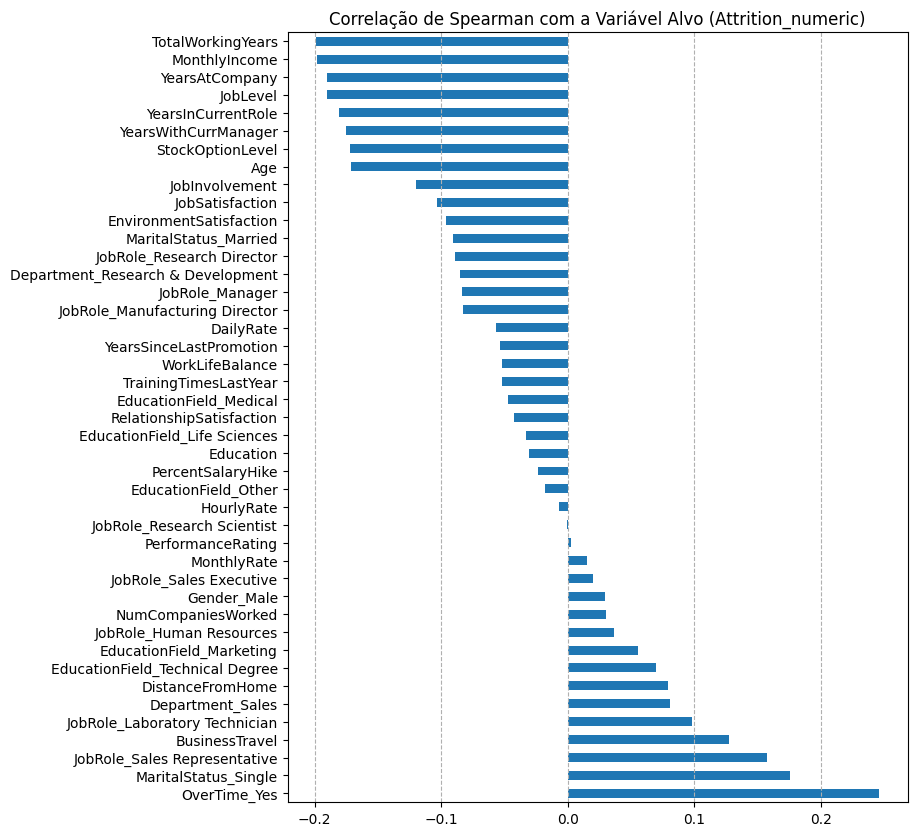

In [32]:
# Correlação entre target e demais features
# Calcula correlaçãode spearman
corr_table = df_final.corr(method='spearman')['Attrition_numeric']

# Ordena tabela de correlação
corr_ordenada = corr_table.sort_values(ascending=False)

print("--- Correlação de cada variável com 'Attrition_numeric' ---\n")
print(corr_ordenada.drop('Attrition_numeric'))

# Cria um gráfico de barras para visualizar melhor
plt.figure(figsize=(8, 10))

# Remove a correlação da própria variável alvo (sempre 1) para o gráfico
corr_ordenada.drop('Attrition_numeric').plot(kind='barh')
plt.title("Correlação de Spearman com a Variável Alvo (Attrition_numeric)")
plt.grid(axis='x', linestyle='--')
plt.show()

In [33]:
# Investiga maiores colinearidades (avaliação aos pares)

# Obtem valores absolutos na matriz de covariância
corr_matriz_abs = corr_matriz.abs()

# Desempilha a matriz para criar uma lista de pares de correlação
corr_unstacked = corr_matriz_abs.unstack()

# Ordene a lista para ver os maiores valores no topo
corr_sorted = corr_unstacked.sort_values(ascending=False)

# 4. Filtre para remover a correlação de uma variável com ela mesma (que é sempre 1), remova os duplicados (a correlação de A com B é a mesma de B com A)
top_corr_pairs = corr_sorted[corr_sorted < 1].drop_duplicates()


print("--- Top 30 Pares Mais Correlacionados no Dataset ---")
print(top_corr_pairs.head(40))

--- Top 30 Pares Mais Correlacionados no Dataset ---
MonthlyIncome                      JobLevel                             0.920429
Department_Sales                   Department_Research & Development    0.906818
YearsAtCompany                     YearsInCurrentRole                   0.854000
                                   YearsWithCurrManager                 0.842803
Department_Sales                   JobRole_Sales Executive              0.808869
JobLevel                           TotalWorkingYears                    0.734678
StockOptionLevel                   MaritalStatus_Single                 0.733879
JobRole_Sales Executive            Department_Research & Development    0.733497
YearsWithCurrManager               YearsInCurrentRole                   0.724754
TotalWorkingYears                  MonthlyIncome                        0.710024
Age                                TotalWorkingYears                    0.656896
MaritalStatus_Married              MaritalStatus_Single 

* Multiplas correlações altas entre as features independentes indicando que carregam informações muito similares.

In [34]:
# Determinar Fator de Inflação de Variância (VIF), multicolinearidade, entre as variáveis independentes
# Quanto a variância de um coeficiente é inflada pelas relações com outras variáveis
vif_data = pd.DataFrame()
vif_data["feature"] = df_final.columns
vif_data["VIF"] = [variance_inflation_factor(df_final.values, i) for i in range(len(df_final.columns))]

In [35]:
# Ordena df com VIF
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

print(" Multicolinearidade como VIF")
print(vif_data_sorted)

 Multicolinearidade como VIF
                              feature        VIF
25  Department_Research & Development  86.940166
10                      MonthlyIncome  51.693324
26                   Department_Sales  51.260387
13                  PercentSalaryHike  42.030843
27       EducationField_Life Sciences  38.808332
0                                 Age  34.879025
29             EducationField_Medical  30.007775
8                            JobLevel  27.158860
39            JobRole_Sales Executive  17.673873
17                  TotalWorkingYears  15.469205
28           EducationField_Marketing  11.621631
6                          HourlyRate  11.492653
20                     YearsAtCompany  10.936457
31    EducationField_Technical Degree   9.242402
19                    WorkLifeBalance   7.310409
7                      JobInvolvement   7.097642
23               YearsWithCurrManager   6.672733
21                 YearsInCurrentRole   6.628561
30               EducationField_Other   

- Várias VIF com valores > 5: tratar!
- Multicolinearidade reduz o poder estatístico de um modelo
- Em datasets com multicolineariade, pequenas alterações nos dados podem levar a grandes alterações nas estimativas dos parâmetros, até mesmo inversões de sinal.

Fontes consultadas:
https://stats.stackexchange.com/tags/multicollinearity/info

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/



# | ✅ PREPARO DOS DADOS


In [36]:
df_model = df_final.copy()

### Seleção de Features

**Metodologia de Exclusão de Features**

A metodologia para a seleção final de features combinou critérios quantitativos (alta correlação de Spearman e alto VIF - Fator de Inflação de Variância) com uma análise qualitativa focada no negócio. O objetivo foi remover redundâncias e, principalmente, excluir variáveis que, embora preditivas, não são diretamente acionáveis para a criação de políticas de RH ou que poderiam introduzir vieses indesejados no modelo.

Tabela de Exclusão de Features e Justificativas

| Feature(s) Excluída(s) | Critério Quantitativo (Redundância) | Justificativa Estratégica (O Porquê da Escolha) |
| :--- | :--- | :--- |
| **Age, TotalWorkingYears, YearsWithCurrManager** | Alta correlação entre si e VIF elevado. | A elaboração de políticas baseadas na idade pode introduzir um **viés etário (Ageism)**.<br>Embora preditivas, são variáveis menos acionáveis e de maior risco ético do ponto de vista de D&I. |
| **MonthlyIncome** | Alta correlação com `JobLevel` (VIF > 5). | `JobLevel` é uma variável mais **estrutural e estável** para a criação de políticas de RH.<br>`MonthlyIncome` é mais volátil (bônus, comissões), sendo menos robusta para ações de longo prazo. |
 **JobRole** | Alta dimensionalidade após one-hot encoding; informação parcialmente redundante com `JobLevel` e `Department`. | Políticas de RH são mais eficazmente implementadas por `JobLevel` ou `Department` do que por cada cargo individual.<br>A exclusão simplifica o modelo e foca em fatores mais generalizáveis. |
| **EducationField** | Alta dimensionalidade após one-hot encoding; alguma sobreposição de informação com `Department`. | Similar a `JobRole`, é pouco prático para o RH criar políticas de retenção específicas por área de formação.<br>A exclusão foca o modelo em variáveis mais diretas e acionáveis, como o departamento atual do colaborador. |



In [38]:
df_model.drop(columns=['MonthlyIncome', 'Age', 'TotalWorkingYears', 'YearsWithCurrManager', 'JobRole_Human Resources','JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director','JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other'], axis=1, inplace=True)

In [39]:
# Avaliando
vif_data = pd.DataFrame()
vif_data["feature"] = df_model.columns
vif_data["VIF"] = [variance_inflation_factor(df_model.values, i) for i in range(len(df_model.columns))]

# Ordena df com VIF
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

print(" Multicolinearidade como VIF")
print(vif_data_sorted)


 Multicolinearidade como VIF
                              feature        VIF
11                  PercentSalaryHike  33.297087
21  Department_Research & Development  14.264525
5                          HourlyRate  10.803912
17                     YearsAtCompany   7.580620
22                   Department_Sales   7.198490
16                    WorkLifeBalance   6.937547
6                      JobInvolvement   6.839077
18                 YearsInCurrentRole   5.936605
15              TrainingTimesLastYear   5.631705
0                      BusinessTravel   5.141871
1                           DailyRate   4.953035
9                         MonthlyRate   4.947692
3                           Education   4.555804
27               MaritalStatus_Single   4.262059
13           RelationshipSatisfaction   3.508814
8                     JobSatisfaction   3.506212
4             EnvironmentSatisfaction   3.505474
14                   StockOptionLevel   3.422801
26              MaritalStatus_Married   

Mesmo com VIF maior do que 5, as variáveis permanecerão na análise, entretanto xxx.

# | 💻 MODELAGEM

### Teste de Diferentes modelos

Métricas de avaliação

*

In [42]:
# Define conjunto de variáveis independentes e targe
X = df_model.drop(columns=['Attrition_numeric'], axis=1)
y = df_model['Attrition_numeric']

In [46]:
# Lista de modelos para testar
models = {
    "Logistic Regression (L2 - Ridge)": LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
    "Logistic Regression (L1 - LASSO)": LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
}

def evaluate_models(X, y):
    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Padronizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}

    for name, model in models.items():
        # Treinar modelo
        model.fit(X_train_scaled, y_train)

        # Previsões
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1]

        # Avaliação
        cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1').mean()
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)

        results[name] = {
            'CV F1-score': cv_score,
            'Test F1-score': f1,
            'ROC AUC': roc_auc,
            'Classification Report': classification_report(y_test, y_pred)
        }

    return pd.DataFrame.from_dict(results, orient='index')

# Uso
results_df = evaluate_models(X, y)
results_df.sort_values(by='Test F1-score', ascending=False)

,CV F1-score,Test F1-score,ROC AUC,Classification Report
Logistic Regression (L2 - Ridge),0.539263,0.440000,0.798749,precision recall f1-score ...
Logistic Regression,0.541049,0.440000,0.798706,precision recall f1-score ...
Logistic Regression (L1 - LASSO),0.532734,0.424242,0.799569,precision recall f1-score ...
XGBoost,0.408444,0.333333,0.747757,precision recall f1-score ...
Random Forest,0.280483,0.169014,0.768399,precision recall f1-score ...


## | 📋 AVALIAÇÃO DOS MODELOS

In [49]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, f1_score, roc_auc_score,
                            precision_score, recall_score, accuracy_score,
                            confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Lista de modelos para testar
models = {
    "Logistic Regression (L2 - Ridge)": LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
    "Logistic Regression (L1 - LASSO)": LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

def evaluate_models(X, y):
    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Padronizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}

    for name, model in models.items():
        # Medição do tempo de treinamento
        start_time = time.time()

        # Treinar modelo
        model.fit(X_train_scaled, y_train)
        fit_time = time.time() - start_time

        # Previsões
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1] if hasattr(model, "predict_proba") else None

        # Cálculo da matriz de confusão
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Métricas com validação cruzada (incluindo desvio padrão)
        cv_f1_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
        cv_roc_auc_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc') if y_proba is not None else [np.nan]*5

        # Armazenamento dos resultados
        results[name] = {
            'Fit Time (s)': fit_time,
            'CV F1-score (mean±std)': f"{cv_f1_scores.mean():.3f} ± {cv_f1_scores.std():.3f}",
            'CV ROC AUC (mean±std)': f"{cv_roc_auc_scores.mean():.3f} ± {cv_roc_auc_scores.std():.3f}" if y_proba is not None else "N/A",
            'Test Accuracy': accuracy_score(y_test, y_pred),
            'Test Precision': precision_score(y_test, y_pred),
            'Test Recall': recall_score(y_test, y_pred),
            'Test F1-score': f1_score(y_test, y_pred),
            'Test ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A",
            'False Positives': fp,
            'False Negatives': fn,
            'True Positives': tp,
            'True Negatives': tn,
        }

    return pd.DataFrame.from_dict(results, orient='index')

# Uso
results_df = evaluate_models(X, y)
results_df.sort_values(by='Test F1-score', ascending=False)

,Fit Time (s),CV F1-score (mean±std),CV ROC AUC (mean±std),Test Accuracy,Test Precision,Test Recall,Test F1-score,Test ROC AUC,False Positives,False Negatives,True Positives,True Negatives
Logistic Regression (L2 - Ridge),0.020325,0.539 ± 0.071,0.840 ± 0.027,0.873016,0.564103,0.360656,0.440000,0.798749,17,39,22,363
Logistic Regression,0.004682,0.541 ± 0.072,0.840 ± 0.027,0.873016,0.564103,0.360656,0.440000,0.798706,17,39,22,363
Logistic Regression (L1 - LASSO),0.047689,0.533 ± 0.060,0.841 ± 0.027,0.870748,0.552632,0.344262,0.424242,0.799569,17,40,21,363
Random Forest,0.295257,0.280 ± 0.065,0.800 ± 0.034,0.866213,0.600000,0.098361,0.169014,0.768399,4,55,6,376


## | 📍 CONCLUSÃO